<a href="https://colab.research.google.com/github/akavurga/Makine_Ogrenmesi_Uygulamalar/blob/main/Travel_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [44]:
import os
os.chdir("/gdrive/MyDrive/Colab Çalışma Ortamı")

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
data = pd.read_csv("Travel.csv")
df = data.copy()
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [85]:
df.corr()['ProdTaken']


CustomerID                  0.056506
ProdTaken                   1.000000
Age                        -0.147254
CityTier                    0.086852
DurationOfPitch             0.078257
NumberOfPersonVisiting      0.009627
NumberOfFollowups           0.112171
PreferredPropertyStar       0.099577
NumberOfTrips               0.018898
Passport                    0.260844
PitchSatisfactionScore      0.051394
OwnCar                     -0.011508
NumberOfChildrenVisiting    0.007421
MonthlyIncome              -0.130585
Name: ProdTaken, dtype: float64

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [87]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [88]:
df['TypeofContact'].unique() # label

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [89]:
df.dropna(how='any',axis=0,inplace=True)

In [90]:
df.index = np.arange(0,4128)

In [91]:
df['Occupation'].unique()  # One hot

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [92]:
df["ProductPitched"].unique()  # label & one hot

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [93]:
df['MaritalStatus'].unique() # one hot

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [94]:
df['Designation'].unique() #one hot

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [95]:
df = pd.get_dummies(df, columns = ["Occupation",'MaritalStatus','Designation','ProductPitched'])

In [96]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,200000,1,41.0,Self Enquiry,3,6.0,Female,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,200001,0,49.0,Company Invited,1,14.0,Male,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,200002,1,37.0,Self Enquiry,1,8.0,Male,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,200003,0,33.0,Company Invited,1,9.0,Female,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,200005,0,32.0,Company Invited,1,8.0,Male,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,204883,1,49.0,Self Enquiry,3,9.0,Male,3,5.0,4.0,2.0,1,1,1,1.0,26576.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4124,204884,1,28.0,Company Invited,1,31.0,Male,4,5.0,3.0,3.0,1,3,1,2.0,21212.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4125,204885,1,52.0,Self Enquiry,3,17.0,Female,4,4.0,4.0,7.0,0,1,1,3.0,31820.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
4126,204886,1,19.0,Self Enquiry,3,16.0,Male,3,4.0,3.0,3.0,0,5,0,2.0,20289.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [97]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

lbe.fit_transform(df["TypeofContact"])

array([1, 0, 1, ..., 1, 1, 1])

In [98]:
df["TypeofContact1"] = lbe.fit_transform(df["TypeofContact"])

In [99]:
df                     # TypeofContact    Self Enquiry	= 1 , Company Invited	= 0

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,TypeofContact1
0,200000,1,41.0,Self Enquiry,3,6.0,Female,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,200001,0,49.0,Company Invited,1,14.0,Male,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,200002,1,37.0,Self Enquiry,1,8.0,Male,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,200003,0,33.0,Company Invited,1,9.0,Female,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,200005,0,32.0,Company Invited,1,8.0,Male,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,204883,1,49.0,Self Enquiry,3,9.0,Male,3,5.0,4.0,2.0,1,1,1,1.0,26576.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4124,204884,1,28.0,Company Invited,1,31.0,Male,4,5.0,3.0,3.0,1,3,1,2.0,21212.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4125,204885,1,52.0,Self Enquiry,3,17.0,Female,4,4.0,4.0,7.0,0,1,1,3.0,31820.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4126,204886,1,19.0,Self Enquiry,3,16.0,Male,3,4.0,3.0,3.0,0,5,0,2.0,20289.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [100]:
df.drop('TypeofContact',axis=1,inplace=True)

In [101]:
df

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,TypeofContact1
0,200000,1,41.0,3,6.0,Female,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,200001,0,49.0,1,14.0,Male,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,200002,1,37.0,1,8.0,Male,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,200003,0,33.0,1,9.0,Female,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,200005,0,32.0,1,8.0,Male,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,204883,1,49.0,3,9.0,Male,3,5.0,4.0,2.0,1,1,1,1.0,26576.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4124,204884,1,28.0,1,31.0,Male,4,5.0,3.0,3.0,1,3,1,2.0,21212.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4125,204885,1,52.0,3,17.0,Female,4,4.0,4.0,7.0,0,1,1,3.0,31820.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4126,204886,1,19.0,3,16.0,Male,3,4.0,3.0,3.0,0,5,0,2.0,20289.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [102]:
df.drop('CustomerID',axis=1,inplace=True)

In [103]:
df

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,TypeofContact1
0,1,41.0,3,6.0,Female,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0,49.0,1,14.0,Male,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,37.0,1,8.0,Male,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,0,33.0,1,9.0,Female,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,32.0,1,8.0,Male,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1,49.0,3,9.0,Male,3,5.0,4.0,2.0,1,1,1,1.0,26576.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4124,1,28.0,1,31.0,Male,4,5.0,3.0,3.0,1,3,1,2.0,21212.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4125,1,52.0,3,17.0,Female,4,4.0,4.0,7.0,0,1,1,3.0,31820.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4126,1,19.0,3,16.0,Male,3,4.0,3.0,3.0,0,5,0,2.0,20289.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [104]:
df["Gender"].value_counts()

Male       2463
Female     1510
Fe Male     155
Name: Gender, dtype: int64

In [105]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [106]:
df['Gender'].replace('Fe Male' ,'Female',inplace=True)

In [107]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [108]:
df["Gender1"] = lbe.fit_transform(df["Gender"])

In [109]:
df  # Gender 0 = Female 1 = Male

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,TypeofContact1,Gender1
0,1,41.0,3,6.0,Female,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,49.0,1,14.0,Male,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1,37.0,1,8.0,Male,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
3,0,33.0,1,9.0,Female,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,32.0,1,8.0,Male,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1,49.0,3,9.0,Male,3,5.0,4.0,2.0,1,1,1,1.0,26576.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1
4124,1,28.0,1,31.0,Male,4,5.0,3.0,3.0,1,3,1,2.0,21212.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4125,1,52.0,3,17.0,Female,4,4.0,4.0,7.0,0,1,1,3.0,31820.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4126,1,19.0,3,16.0,Male,3,4.0,3.0,3.0,0,5,0,2.0,20289.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1


In [110]:
df.drop('Gender',axis=1,inplace=True)   ## :) df[df.Gender=='Fe Male'] = 'Female' böyle yaharsam olmaz tabi string değer atamış gibi oldum 

In [111]:
df

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,TypeofContact1,Gender1
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,1.0,18068.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1
4124,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4125,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4126,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1


In [112]:
df.dtypes

ProdTaken                        int64
Age                            float64
CityTier                         int64
DurationOfPitch                float64
NumberOfPersonVisiting           int64
NumberOfFollowups              float64
PreferredPropertyStar          float64
NumberOfTrips                  float64
Passport                         int64
PitchSatisfactionScore           int64
OwnCar                           int64
NumberOfChildrenVisiting       float64
MonthlyIncome                  float64
Occupation_Free Lancer           uint8
Occupation_Large Business        uint8
Occupation_Salaried              uint8
Occupation_Small Business        uint8
MaritalStatus_Divorced           uint8
MaritalStatus_Married            uint8
MaritalStatus_Single             uint8
MaritalStatus_Unmarried          uint8
Designation_AVP                  uint8
Designation_Executive            uint8
Designation_Manager              uint8
Designation_Senior Manager       uint8
Designation_VP           

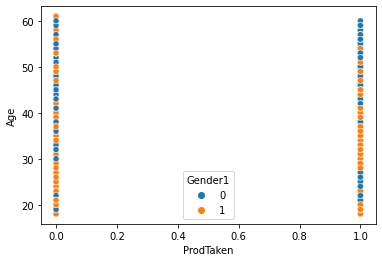

In [117]:
sns.scatterplot(x='ProdTaken',y='Age',hue='Gender1',data=df);

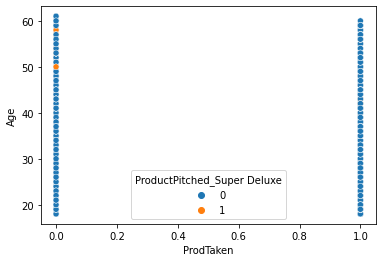

In [118]:
sns.scatterplot(x='ProdTaken',y='Age',hue='ProductPitched_Super Deluxe',data=df);

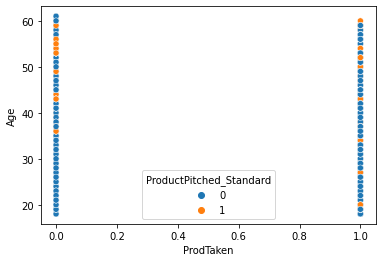

In [119]:
sns.scatterplot(x='ProdTaken',y='Age',hue='ProductPitched_Standard',data=df);

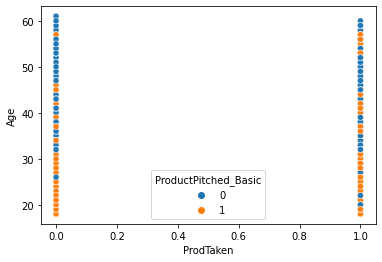

In [120]:
sns.scatterplot(x='ProdTaken',y='Age',hue='ProductPitched_Basic',data=df);

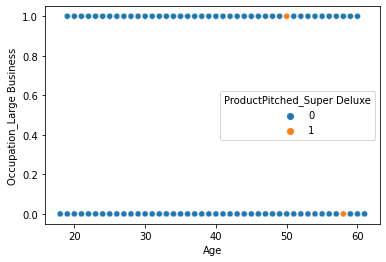

In [125]:

sns.scatterplot(x=df.Age,y='Occupation_Large Business',hue='ProductPitched_Super Deluxe',data=df);

In [128]:
df.corr()['ProdTaken']

ProdTaken                      1.000000
Age                           -0.154934
CityTier                       0.090921
DurationOfPitch                0.082220
NumberOfPersonVisiting         0.003716
NumberOfFollowups              0.110966
PreferredPropertyStar          0.100325
NumberOfTrips                  0.015424
Passport                       0.271293
PitchSatisfactionScore         0.052029
OwnCar                        -0.008681
NumberOfChildrenVisiting       0.008491
MonthlyIncome                 -0.133581
Occupation_Free Lancer         0.045010
Occupation_Large Business      0.079387
Occupation_Salaried           -0.033097
Occupation_Small Business     -0.015036
MaritalStatus_Divorced        -0.073883
MaritalStatus_Married         -0.124316
MaritalStatus_Single           0.190461
MaritalStatus_Unmarried        0.056726
Designation_AVP               -0.075308
Designation_Executive          0.217802
Designation_Manager           -0.141486
Designation_Senior Manager    -0.037331


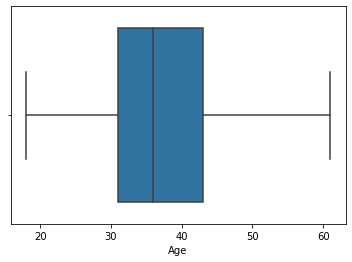

In [131]:
sns.boxplot(x="Age",data=df);

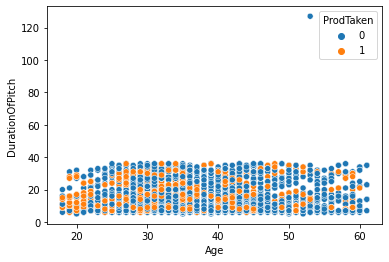

In [147]:
sns.scatterplot(x=df.Age,y='DurationOfPitch',hue='ProdTaken',data=df);

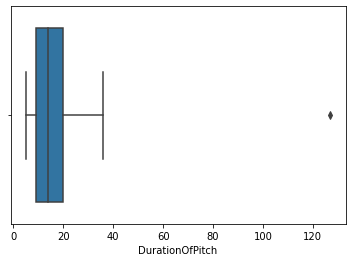

In [146]:
sns.boxplot(x='DurationOfPitch',data=df)

In [152]:
from sklearn.metrics import confusion_matrix , accuracy_score , mean_squared_error , r2_score , roc_auc_score , roc_curve ,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV 

In [153]:
y=df['ProdTaken']
X=df.drop(['ProdTaken'],axis=1)
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [154]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [156]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7772397094430993

In [166]:
knn_model = KNeighborsClassifier(n_neighbors=16).fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8002421307506054

In [170]:
knn_params= {"n_neighbors" : np.arange(1,50)}
knn_cv_model = GridSearchCV(knn_model,knn_params,cv=4).fit(X_train,y_train)
print(knn_cv_model.best_params_)
print(knn_cv_model.best_score_)

{'n_neighbors': 1}
0.8228332966468559


In [171]:
knn_tuned_model = KNeighborsClassifier(n_neighbors= 1).fit(X_train,y_train)
y_pred = knn_tuned_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8668280871670703